# Team Project - Get to know your data
## Team 4: Qiqi Wang, Jiachen Wang, Yanli pei, Honggeun Jo

## Objectives
### 1. Evaluate data coverage, sampling
### 2. Calculate and characterize the facies, porosity, perm and AI distributions
        location maps and histograms, summary statistics, outliers
### 3. Compare the well-based and seismic acoustic impedance
        is there likely issues of sampling bias 
### 4. Plot location map: wells and map of AI
        identify and features of interest for reservoir potential

# 0. Load package, initial setting, and fetching data

In [2]:
## Import needed package
import os                                                   # set current working directory 
import numpy as np                                          # ndarrays
import pandas as pd                                         # DataFrames
import matplotlib.pyplot as plt                             # plotting
from scipy import stats                                     # summary stats
import geostatspy.GSLIB as GSLIB          # GSLIB utilies, visualization and wrapper
import geostatspy.geostats as geostats    # GSLIB methods convert to Python        

## Set Working Directory
os.chdir("C:/Users/jhg13/Documents/GeoStat/Project 1/GS_1-master")  # set the working directory

# Load Data 
df = pd.read_csv("4_sample_data.csv")                       # well sample data
AI_map = np.loadtxt("4_AI.csv", delimiter = ",")            # AI map 

It seems that the first column seems not needed...

In [3]:
df.head()

,Unnamed: 0,X,Y,Facies,Porosity,Perm,AI
0,5,70,580,1,0.102475,30.149009,3477.934210
1,15,140,860,1,0.086987,8.540175,3500.807463
2,22,140,370,1,0.091117,266.893061,3478.303116
3,23,140,300,1,0.097404,5.483678,3428.434722
4,24,140,230,1,0.089087,29.146330,3853.554854


In [4]:
df_subset = df.iloc[:,1:7] 
df_subset.head()

,X,Y,Facies,Porosity,Perm,AI
0,70,580,1,0.102475,30.149009,3477.934210
1,140,860,1,0.086987,8.540175,3500.807463
2,140,370,1,0.091117,266.893061,3478.303116
3,140,300,1,0.097404,5.483678,3428.434722
4,140,230,1,0.089087,29.146330,3853.554854


In [4]:
print ("The number of well data sample is %.0f, \n and total number of reservoir cells are %.0f" % (df_subset.shape[0], AI_map.shape[0]*AI_map.shape[1]))

The number of well data sample is 178, 
 and total number of reservoir cells are 10000


# 1.Data Coverage

1.1 How much out sample cover the total area

In [5]:
num_data=df_subset.shape[0]
num_total=AI_map.shape[0]*AI_map.shape[1]
print("Well samples cover %.3f %%" % (num_data/num_total*100))

Well samples cover 1.780 %


1.2 Show the location of sample data

In [5]:

# Define initial setting
xmin = 0.0; xmax = 1000.0               # range of x values
ymin = 0.0; ymax = 1000.0               # range of y values
pormin = 0.0; pormax = 0.2;             # range of porosity values
permmin = 0.01; permmax = 6000;
AImin = 1000.0; AImax = 5500
Fmin = 0; Fmax = 1

cmap = plt.cm.plasma                    # color map

xmin = 0.0; xmax = 1000.0               # range of x values
ymin = 0.0; ymax = 1000.0               # range of y values
gcsize = 10.0;                          # grid cell size

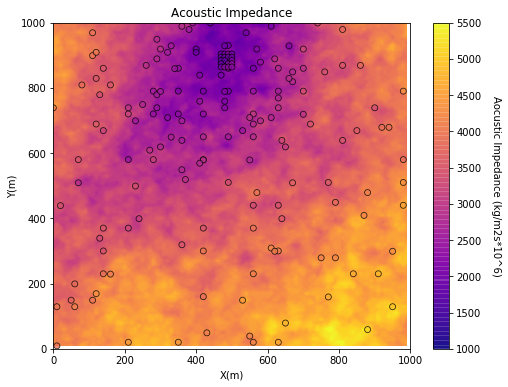

In [6]:
GSLIB.locpix(AI_map,xmin,xmax,ymin,ymax,gcsize,AImin,AImax,df_subset,'X','Y','AI','Acoustic Impedance','X(m)','Y(m)','Aocustic Impedance (kg/m2s*10^6)',cmap,'pixelplot_Acoustic_Impedance')

# 2. Calculate and characterize the facies, porosity, perm and AI distributions


1) Location map

2) histograms

3) summary statistics

4) Outlier

5) Based on their facies statistics, histogram, and PDF

### 1) Location map 

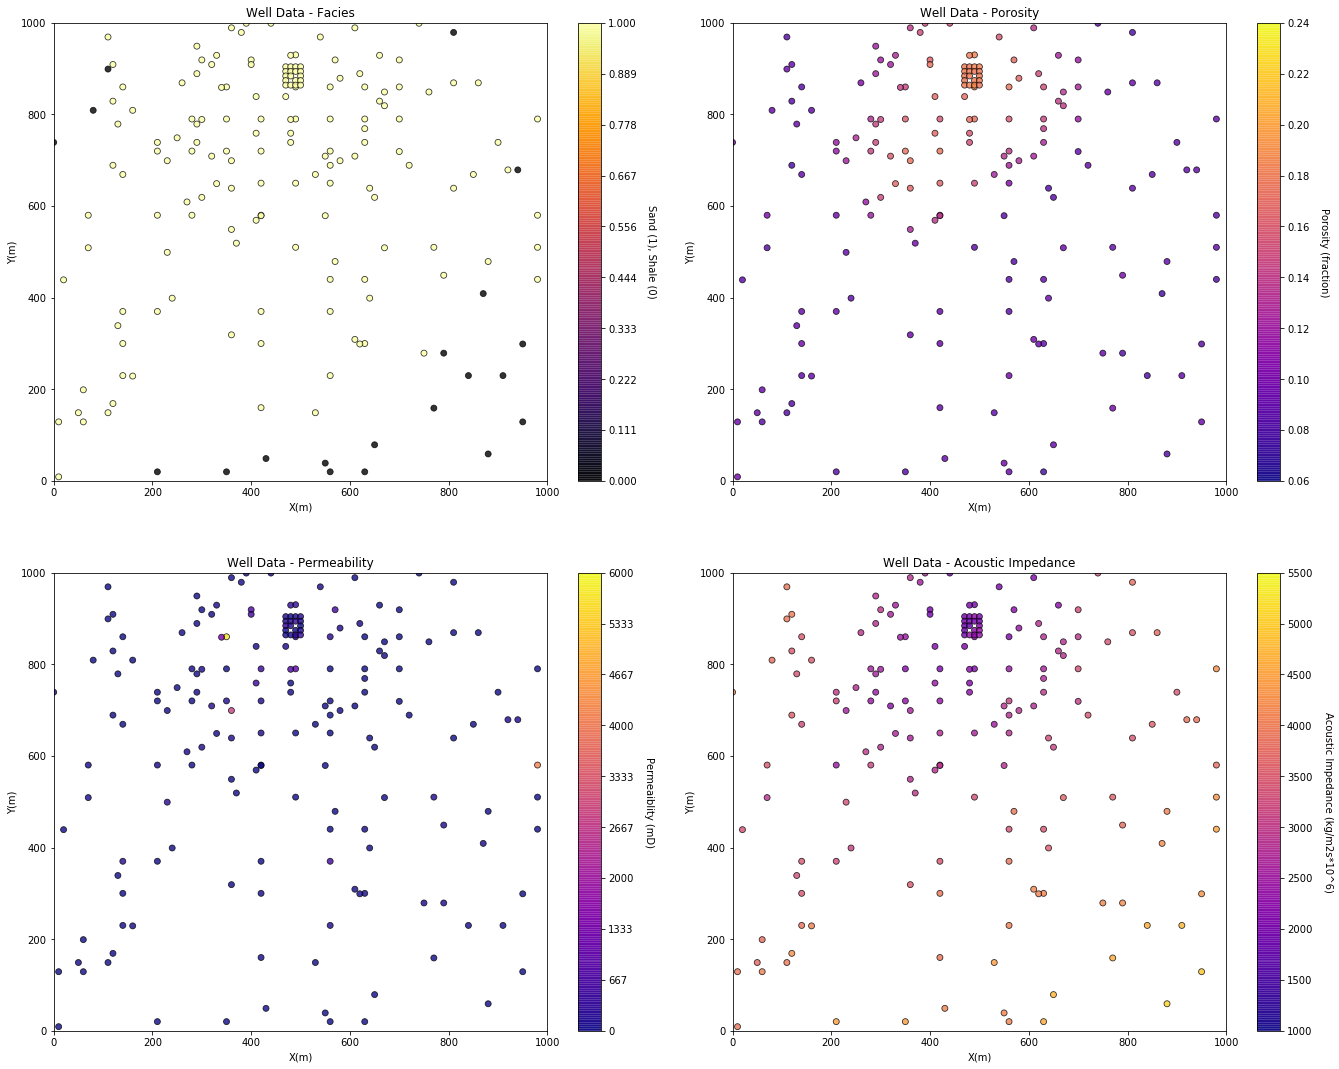

In [8]:
## 1) Location map 

# Define initial setting
xmin = 0.0; xmax = 1000.0               # range of x values
ymin = 0.0; ymax = 1000.0               # range of y values
pormin = 0.0; pormax = 0.2;             # range of porosity values
permmin = 0.01; permmax = 6000;
AImin = 1000.0; AImax = 5500
Fmin = 0; Fmax = 1

cmap = plt.cm.plasma                    # color map

# Draw location
plt.subplot(221)
GSLIB.locmap_st(df_subset,'X','Y','Facies',xmin,xmax,ymin,ymax,Fmin,Fmax,'Well Data - Facies','X(m)','Y(m)','Sand (1), Shale (0)',plt.cm.inferno)

plt.subplot(222)
GSLIB.locmap_st(df_subset,'X','Y','Porosity',xmin,xmax,ymin,ymax,0.06,0.24,'Well Data - Porosity','X(m)','Y(m)','Porosity (fraction)',cmap)

plt.subplot(223)
GSLIB.locmap_st(df_subset,'X','Y','Perm',xmin,xmax,ymin,ymax,permmin,permmax,'Well Data - Permeability','X(m)','Y(m)','Permeaiblity (mD)',cmap)

plt.subplot(224)
GSLIB.locmap_st(df_subset,'X','Y','AI',xmin,xmax,ymin,ymax,AImin,AImax,'Well Data - Acoustic Impedance','X(m)','Y(m)','Acoustic Impedance (kg/m2s*10^6)',cmap)

plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=3.5, wspace=0.1, hspace=0.2)
plt.savefig('All_location_maps.tif',dpi=600,bbox_inches="tight")
plt.show()

In [ ]:
## Code without using Dr. Pyrcz's
X_loc = df_subset.values[:,0]
Y_loc = df_subset.values[:,1]
plt.scatter(X_loc, Y_loc, s=10)
plt.title('Location map')
plt.xlabel('X axis, m')
plt.ylabel('Y axis, m')
plt.axis([0,1000,0,1000])
plt.axis('scaled') 
plt.show()

# plt.savefig('Location Map of well data')

### 2) Histogram

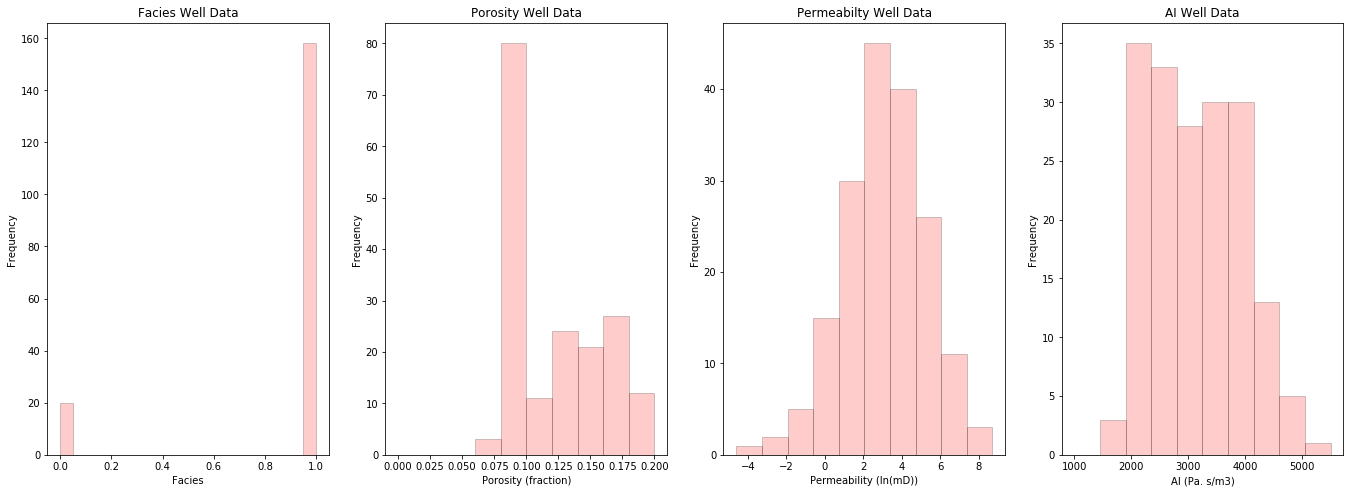

In [68]:
plt.subplot(141)
GSLIB.hist_st(df['Facies'].values,Fmin,Fmax,log=False,cumul = False,bins=20,weights = None,xlabel='Facies',title='Facies Well Data')

plt.subplot(142)
GSLIB.hist_st(df['Porosity'].values,pormin,pormax,log=False,cumul = False,bins=10,weights = None,xlabel='Porosity (fraction)',title='Porosity Well Data')

plt.subplot(143)
GSLIB.hist_st(np.log(df['Perm'].values),np.log(permmin),np.log(permmax),log=False,cumul = False,bins=10,weights = None,xlabel='Permeability (ln(mD))',title='Permeabilty Well Data')

plt.subplot(144)
GSLIB.hist_st(df['AI'].values,AImin,AImax,log=False,cumul = False,bins=10,weights = None,xlabel='AI (kg/m2s*10^6)',title='AI Well Data')

plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=1.5, wspace=0.2, hspace=0.1)
plt.savefig('hist_Porosity_Multiple_bins.tif',dpi=600,bbox_inches="tight")
plt.show()

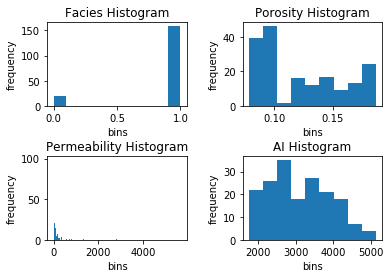

In [90]:
## Code without using Dr. Pyrcz's
Facies = df_subset.values[:,2]
Poro = df_subset.values[:,3]
Perm = df_subset.values[:,4]
AI = df_subset.values[:,5]

plt.subplots_adjust(wspace=0.4, # wspace controls the width of space between subplots
                    hspace=0.6)  # hspace controls the hight of space between subplots

plt.subplot(221)
plt.hist(Facies,bins = 10)
plt.title('Facies Histogram')
plt.xlabel('bins')
plt.ylabel('frequency')

plt.subplot(222)
plt.hist(Poro,bins = 'auto')
plt.title('Porosity Histogram')
plt.xlabel('bins')
plt.ylabel('frequency')

plt.subplot(223)
plt.hist(Perm,bins = 'auto')
plt.title('Permeability Histogram')
plt.xlabel('bins')
plt.ylabel('frequency')

plt.subplot(224)
plt.hist(AI,bins = 'auto')
plt.title('AI Histogram')
plt.xlabel('bins')
plt.ylabel('frequency')

plt.show()

### 3) summary statistics

In [76]:
print('Facies') 
print(stats.describe(Facies))
print('Porosity') 
print(stats.describe(Poro))
print('Permeability') 
print(stats.describe(Perm))
print('Acoustic Impedence') 
print(stats.describe(AI))

Facies
DescribeResult(nobs=178, minmax=(0.0, 1.0), mean=0.88764044943820219, variance=0.10029835586872338, skewness=-2.45490983102863, kurtosis=4.026582278481017)
Porosity
DescribeResult(nobs=178, minmax=(0.078601286797864128, 0.1863112059530446), mean=0.12249127893417977, variance=0.0012350787339198525, skewness=0.4581540362108679, kurtosis=-1.31552041436173)
Permeability
DescribeResult(nobs=178, minmax=(0.027218354189205173, 5689.8234201751939), mean=162.37275649774085, variance=342659.09171019658, skewness=7.250547282615892, kurtosis=57.75073683691917)
Acoustic Impedence
DescribeResult(nobs=178, minmax=(1759.4032622726911, 5124.532353793652), mean=3115.4246947634442, variance=637547.19645498332, skewness=0.2917414656256699, kurtosis=-0.8862453957746519)


In [24]:
df_subset.describe().transpose().iloc[2:6]

,count,mean,std,min,25%,50%,75%,max
Facies,178.0,0.887640,0.316699,0.000000,1.000000,1.000000,1.000000,1.000000
Porosity,178.0,0.122491,0.035144,0.078601,0.091162,0.116853,0.151399,0.186311
Perm,178.0,162.372756,585.370901,0.027218,5.745164,23.820284,90.555638,5689.823420
AI,178.0,3115.424695,798.465526,1759.403262,2439.938679,2937.328224,3787.043657,5124.532354


### 4) Outlier
It seems there are some outlier in permeability data

In [16]:
# Defined boxplot function
def boxplot(array,xmin,xmax,ylabel,title,fig_name):
    plt.figure(figsize=(8,6))
    cs = plt.boxplot(array)
    plt.axis([0,2,xmin,xmax])
    plt.title(title)
    plt.ylabel(ylabel);    
    plt.show()
    image_type = 'tif'; dpi = 600
    plt.savefig(fig_name + '.' + image_type,dpi=dpi)    
    return

def boxplot_st(array,xmin,xmax,ylabel,title):
    cs = plt.boxplot(array)
    plt.axis([0,2,xmin,xmax])
    plt.title(title)
    plt.ylabel(ylabel);
    return

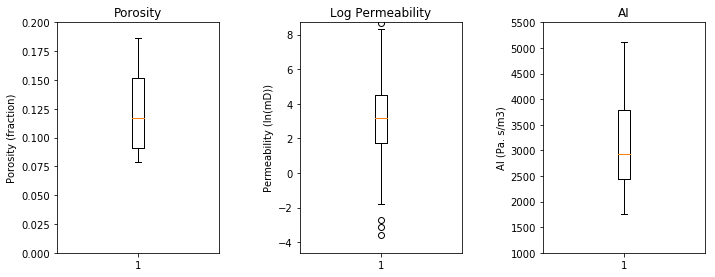

In [95]:
# Draw Boxplots
plt.subplot(131)
boxplot_st(df_subset['Porosity'].values,pormin,pormax,ylabel='Porosity (fraction)',title='Porosity')

plt.subplot(132)
boxplot_st(np.log(df_subset['Perm'].values),np.log(permmin),np.log(permmax),ylabel='Permeability (ln(mD))',title='Log Permeability')

plt.subplot(133)
boxplot_st(df_subset['AI'].values,AImin,AImax,ylabel='AI (kg/m2s*10^6)',title='AI')


plt.subplots_adjust(left=0.0, bottom=0.0, right=1.5, top=0.8, wspace=0.5, hspace=0.2)
plt.show()

plt.savefig('BoxPlot.tif',dpi=600,bbox_inches="tight")


5) Based on the facies

In [14]:
# Split data frame into two part based on their facies
df_sand=df_subset.loc[(df_subset['Facies']==1)]
df_shale=df_subset.loc[(df_subset['Facies']==0)]

In [15]:
df_shale.head()

,X,Y,Facies,Porosity,Perm,AI
8,210,20,0,0.085198,1.458767,4452.085162
15,350,20,0,0.083397,0.212234,4440.914505
35,560,20,0,0.091758,2.473886,4152.738833
40,630,20,0,0.078687,11.983378,4591.814934
44,840,230,0,0.080948,7.785112,4668.362344


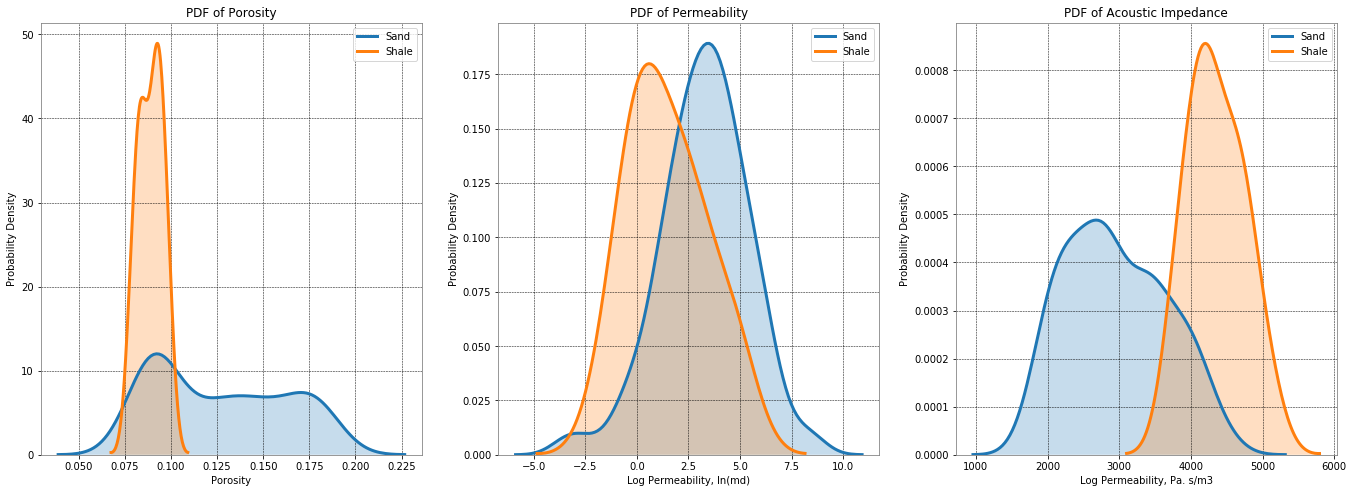

In [22]:
# PDF of individual facies

import seaborn as sns
plt.clf()

pormin = 0.0; pormax = 0.2;             # range of porosity values
permmin = 0.01; permmax = 6000;
AImin = 1000.0; AImax = 5500
Fmin = 0; Fmax = 1



plt.subplot(131)

sns.distplot(df_sand['Porosity'], hist = False, kde = True, kde_kws ={'shade': True, 'linewidth': 3}, label = 'Sand' )
sns.distplot(df_shale['Porosity'], hist = False, kde = True, kde_kws ={'shade': True, 'linewidth': 3}, label = 'Shale' )

plt.title('PDF of Porosity')
plt.xlabel('Porosity')
plt.ylabel('Probability Density')
ax = plt.gca(); ax.set_facecolor('w');
ax.spines['bottom'].set_color('0.5'); ax.spines['top'].set_color('0.5');
ax.spines['right'].set_color('0.5'); ax.spines['left'].set_color('0.5');
plt.grid('on',color='k', linestyle='--', linewidth=0.5)

plt.subplot(132)

sns.distplot(np.log(df_sand['Perm']), hist = False, kde = True, kde_kws ={'shade': True, 'linewidth': 3}, label = 'Sand' )
sns.distplot(np.log(df_shale['Perm']), hist = False, kde = True, kde_kws ={'shade': True, 'linewidth': 3}, label = 'Shale' )

plt.title('PDF of Permeability')
plt.xlabel('Log Permeability, ln(md)')
plt.ylabel('Probability Density')
ax = plt.gca(); ax.set_facecolor('w');
ax.spines['bottom'].set_color('0.5'); ax.spines['top'].set_color('0.5');
ax.spines['right'].set_color('0.5'); ax.spines['left'].set_color('0.5');
plt.grid('on',color='k', linestyle='--', linewidth=0.5)

plt.subplot(133)

sns.distplot(df_sand['AI'], hist = False, kde = True, kde_kws ={'shade': True, 'linewidth': 3}, label = 'Sand' )
sns.distplot(df_shale['AI'], hist = False, kde = True, kde_kws ={'shade': True, 'linewidth': 3}, label = 'Shale' )

plt.title('PDF of Acoustic Impedance')
plt.xlabel('Log Permeability, kg/m2s*10^6')
plt.ylabel('Probability Density')
ax = plt.gca(); ax.set_facecolor('w');
ax.spines['bottom'].set_color('0.5'); ax.spines['top'].set_color('0.5');
ax.spines['right'].set_color('0.5'); ax.spines['left'].set_color('0.5');
plt.grid('on',color='k', linestyle='--', linewidth=0.5)



plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=1.5, wspace=0.2, hspace=0.1)

plt.savefig('hist_Porosity_Multiple_bins.tif',dpi=600,bbox_inches="tight")
plt.show()

In [35]:
# Statistics

print('Statistics for Sand\n')
print(df_sand.iloc[:,3:6].describe().transpose())


print('\n\nStatistics for Shale\n')
print(df_shale.iloc[:,3:6].describe().transpose())

Statistics for Sand

          count         mean         std          min          25%  \
Porosity  158.0     0.126750    0.035001     0.079210     0.092165   
Perm      158.0   180.220811  619.080385     0.027218     7.482659   
AI        158.0  2958.664034  693.430024  1759.403262  2383.633549   

                  50%          75%          max  
Porosity     0.122782     0.158212     0.186311  
Perm        26.373074   106.854123  5689.823420  
AI        2860.908860  3478.210890  4516.534318  


Statistics for Shale

          count         mean         std          min          25%  \
Porosity   20.0     0.088845    0.006369     0.078601     0.083631   
Perm       20.0    21.373123   40.267366     0.212234     1.200728   
AI         20.0  4353.833915  383.703071  3771.938792  4139.550650   

                  50%          75%          max  
Porosity     0.090610     0.093412     0.097991  
Perm         2.866398    16.343926   130.115998  
AI        4256.907100  4659.196986  5124.53

<Figure size 432x288 with 0 Axes>

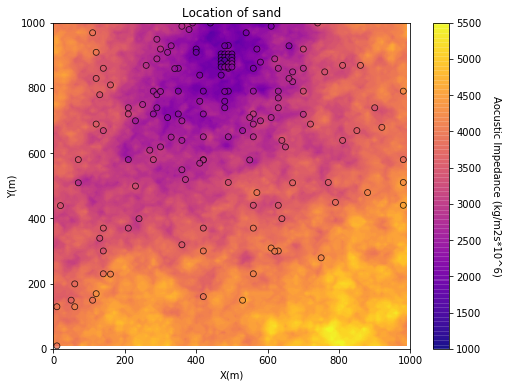

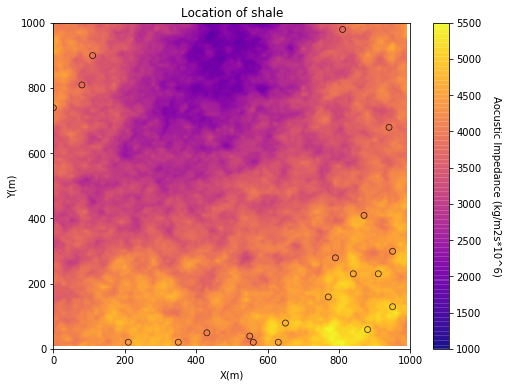

In [41]:
# Location Map
plt.clf()

GSLIB.locpix(AI_map,xmin,xmax,ymin,ymax,gcsize,AImin,AImax,df_sand,'X','Y','AI','Location of sand','X(m)','Y(m)','Aocustic Impedance (kg/m2s*10^6)',cmap,'pixelplot_Acoustic_Impedance')
GSLIB.locpix(AI_map,xmin,xmax,ymin,ymax,gcsize,AImin,AImax,df_shale,'X','Y','AI','Location of shale','X(m)','Y(m)','Aocustic Impedance (kg/m2s*10^6)',cmap,'pixelplot_Acoustic_Impedance')



Boxplots for Sand facies



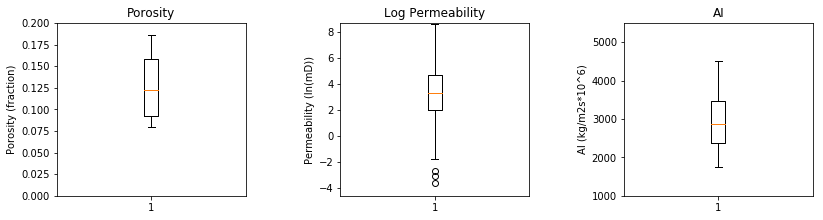

Boxplots for Shale facies


<Figure size 432x288 with 0 Axes>

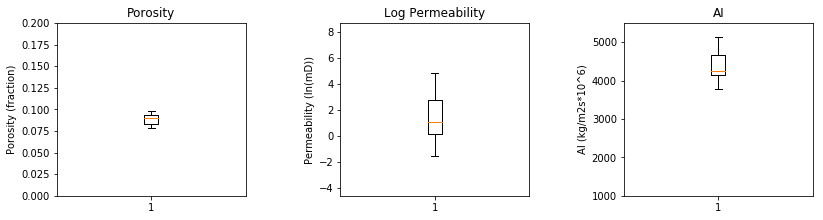

<Figure size 432x288 with 0 Axes>

In [49]:
# Draw Boxplots to check outlier

print('Boxplots for Sand facies\n')
plt.figure(figsize=(7,3))
plt.subplot(131)
boxplot_st(df_sand['Porosity'].values,pormin,pormax,ylabel='Porosity (fraction)',title='Porosity')
plt.subplot(132)
boxplot_st(np.log(df_sand['Perm'].values),np.log(permmin),np.log(permmax),ylabel='Permeability (ln(mD))',title='Log Permeability')
plt.subplot(133)
boxplot_st(df_sand['AI'].values,AImin,AImax,ylabel='AI (kg/m2s*10^6)',title='AI')

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.5, top=0.8, wspace=0.5, hspace=0.2)
plt.show()

plt.savefig('BoxPlot.tif',dpi=600,bbox_inches="tight")


print('Boxplots for Shale facies')
plt.figure(figsize=(7,3))
plt.subplot(131)
boxplot_st(df_shale['Porosity'].values,pormin,pormax,ylabel='Porosity (fraction)',title='Porosity')
plt.subplot(132)
boxplot_st(np.log(df_shale['Perm'].values),np.log(permmin),np.log(permmax),ylabel='Permeability (ln(mD))',title='Log Permeability')
plt.subplot(133)
boxplot_st(df_shale['AI'].values,AImin,AImax,ylabel='AI (kg/m2s*10^6)',title='AI')

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.5, top=0.8, wspace=0.5, hspace=0.2)
plt.show()

plt.savefig('BoxPlot_Shale.tif',dpi=600,bbox_inches="tight")



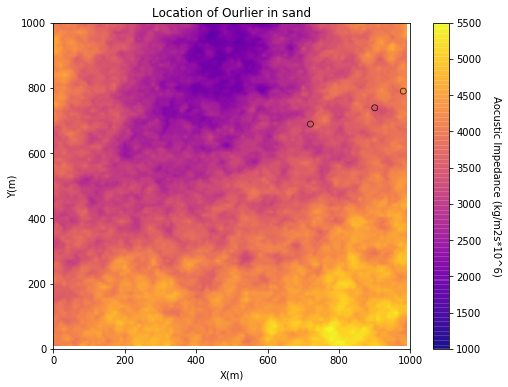

In [54]:
# There is only three outlier in sand... pick the location of outlier!
df_sand_outlier=df_sand.loc[(df_sand['Perm']<np.exp(-2.0))]

GSLIB.locpix(AI_map,xmin,xmax,ymin,ymax,gcsize,AImin,AImax,df_sand_outlier,'X','Y','AI','Location of Ourlier in sand','X(m)','Y(m)','Aocustic Impedance (kg/m2s*10^6)',cmap,'pixelplot_Acoustic_Impedance')



# 3. Compare the well-based and seismic acoustic impedance


In [120]:
# Comparing with statistic
print('The average of well data AI is %.2f' %(np.mean(df_subset['AI'].values)))
print('whereas, the average of AI map is %.2f \n' %(np.mean(AI_map.flatten())))

print('The STD of well data AI is %.2f' %(np.std(df_subset['AI'].values)))
print('whereas, the STD of AI map is %.2f \n' %(np.std(AI_map.flatten())))

P10_AI_well, P50_AI_well, P90_AI_well = np.percentile(df_subset['AI'].values,[0.10, 0.50, 0.90])
P10_AI_map, P50_AI_map, P90_AI_map = np.percentile(AI_map.flatten(),[0.10, 0.50,0.90])
print('P10, P50, and P90 of well data AI is %.2f, %.2f, and %.2f, respectively' %(P10_AI_well,P50_AI_well, P90_AI_well))
print('whereas, P10, P50, and P90 of AI map is %.2f, %.2f, and %.2f, respectively \n' %(P10_AI_map, P50_AI_map, P90_AI_map))


The average of well data AI is 3115.42
whereas, the average of AI map is 3610.00 

The STD of well data AI is 796.22
whereas, the STD of AI map is 722.00 

P10, P50, and P90 of well data AI is 1772.30, 1823.91, and 1862.27, respectively
whereas, P10, P50, and P90 of AI map is 1819.92, 1942.48, and 1987.97, respectively 



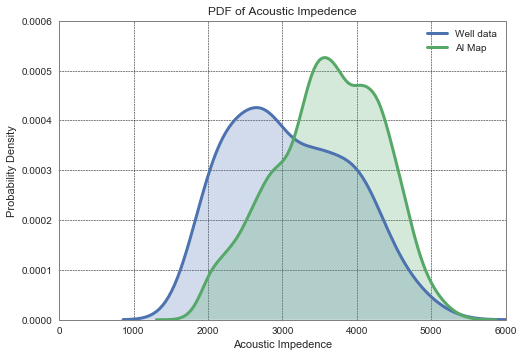

In [167]:
# Comparing with PDF or CDF
import seaborn as sns
plt.clf()

sns.distplot(df_subset['AI'], hist = False, kde = True, kde_kws ={'shade': True, 'linewidth': 3}, label = 'Well data' )
sns.distplot(AI_map.flatten(), hist = False, kde = True, kde_kws ={'shade': True, 'linewidth': 3}, label = 'AI Map' )

plt.title('PDF of Acoustic Impedence')
plt.xlabel('Acoustic Impedence')
plt.ylabel('Probability Density')
plt.axis([0, 6000,0,0.0006])
ax = plt.gca()
ax.set_facecolor('w')
ax.spines['bottom'].set_color('0.5')
ax.spines['top'].set_color('0.5')
ax.spines['right'].set_color('0.5')
ax.spines['left'].set_color('0.5')
plt.grid('on',color='k', linestyle='--', linewidth=0.5)


plt.show()
plt.savefig('PDF of AI sample and map',dpi=600)


In [76]:
# t-test: compare the mean of the above two groups (two tailed test)
t_value, p_value=stats.ttest_ind(df_subset['AI'].values,AI_map.flatten())
alpha=0.05
if p_value < alpha/2:
    print ("Null hypothesis rejected\n")
    print ("Mean of Well sample and AI map are different with 5% significance level\n")
    print ("Warning: Samples can be biased")
else:
    print ("Null hypothesis is failed to be rejected")
    print ("Mean of Well sample and AI map are not significantly different with 5% significance level\n")
    print ("Samples look representative for population")

Null hypothesis rejected

Mean of Well sample and AI map are different with 5% significance level



In [78]:
# F-test: compare the variance of the above two groups
if df_subset['AI'].values.var() > AI_map.flatten().var():
    F=df_subset['AI'].values.var()/AI_map.flatten().var()
else:
    F=AI_map.flatten().var()/df_subset['AI'].values.var()

dof_1=len(df_subset['AI'].values)-1; dof_2=len(AI_map.flatten())-1;
p_value = stats.f.cdf(F, dof_1, dof_2)


alpha=0.05
if p_value < alpha:
    print ("Null hypothesis rejected\n")
    print ("Varience of Well sample and AI map are different with 5% significance level\n")
    print ("Warning: Samples can be biased")
else:
    print ("Null hypothesis is failed to be rejected\n")
    print ("Varience of Well sample and AI map are not significantly different with 5% significance level\n")
    print ("Samples look representative for population")

Null hypothesis is failed to be rejected

Varience of Well sample and AI map are not significantly different with 5% significance level

Samples look representative for population


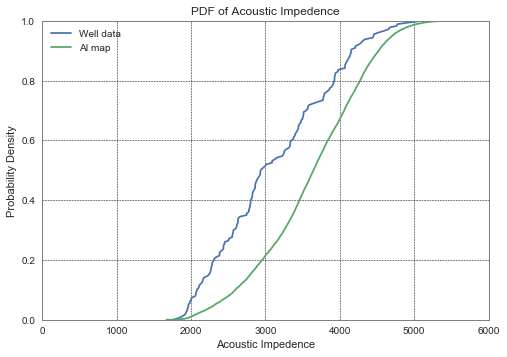

In [181]:
# Comparing with PDF or CDF

Sort_well = np.sort(df_subset['AI'].values)
Sort_map = np.sort(AI_map.flatten())

p_well = 1.* np.arange(len(Sort_well))/(len(Sort_well)-1)
p_map = 1.* np.arange(len(Sort_map))/(len(Sort_map)-1)


fig1 = plt.plot(Sort_well,p_well)
fig2 = plt.plot(Sort_map, p_map)

plt.legend((fig1[0],fig2[0]),('Well data', 'AI map'))
plt.title('PDF of Acoustic Impedence')
plt.xlabel('Acoustic Impedence')
plt.ylabel('Probability Density')
plt.axis([0, 6000,0, 1])
ax = plt.gca()
ax.set_facecolor('w')
ax.spines['bottom'].set_color('0.5')
ax.spines['top'].set_color('0.5')
ax.spines['right'].set_color('0.5')
ax.spines['left'].set_color('0.5')
plt.grid('on',color='k', linestyle='--', linewidth=0.5)

plt.show()
plt.savefig('CDF of AI sample and map',dpi=600)


Comment: Sample and total data set shows different statistics, PDF and CDF.

# 4. Plot location map: wells and map of AI

In [98]:
xmin = 0.0; xmax = 1000.0               # range of x values
ymin = 0.0; ymax = 1000.0               # range of y values
gcsize = 10.0;                          # grid cell size

10.0


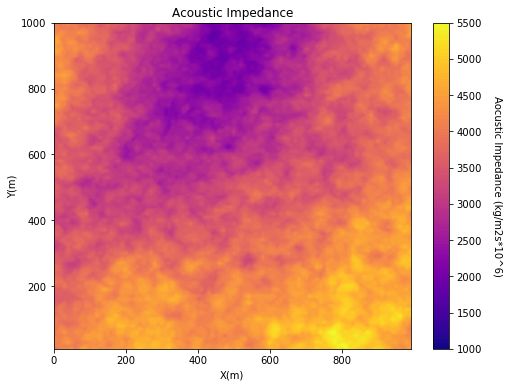

In [105]:
GSLIB.pixelplt(AI_map,xmin,xmax,ymin,ymax,gcsize,AImin,AImax,'Acoustic Impedance','X(m)','Y(m)','Aocustic Impedance (kg/m2s*10^6)',cmap,'pixelplot_Acoustic_Impedance')


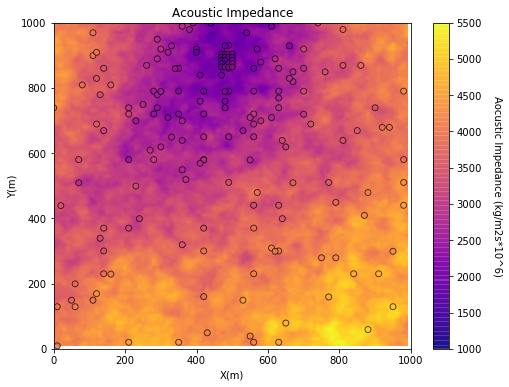

In [106]:
GSLIB.locpix(AI_map,xmin,xmax,ymin,ymax,gcsize,AImin,AImax,df_subset,'X','Y','AI','Acoustic Impedance','X(m)','Y(m)','Aocustic Impedance (kg/m2s*10^6)',cmap,'pixelplot_Acoustic_Impedance')

Comment: well data are sampled mainly in the low AI zone. Looks like slighty biased sample.